In [1]:
# import module
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# ready data
boston = load_boston()
""" print("/*"+"="*10+"*/")
print(boston['DESCR'])
print("/*"+"="*10+"*/")
print(boston['data'])
print("/*"+"="*10+"*/")
print(boston['feature_names']) """
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
Y = pd.DataFrame(boston['target'])
# print("/*"+"="*10+"*/")
print("X_info = ", X.info)
print("Y_info = ", Y.info)

X_info =  <bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98

In [3]:
# set model
clf = linear_model.LinearRegression()
T_score = []
mse = []
for i in range(1, 10):
    print("test size = ", 0.1*i)
    # split data to training & test
    X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X, Y, test_size=0.1*i)
    """ print("size of training data:(explanatory variable)(response variable)")
    print(X_train.shape, Y_train.shape)
    print("size of test data:(explanatory variable)(response variable)")
    print(X_test.shape, Y_test.shape) """
    # learning
    clf.fit(X_train, Y_train)
    # print("Regression coefficient = ", clf.coef_)
    # print("Intercept = ", clf.intercept_)
    # print("Score = ", clf.score(X_train, Y_train))
    # predict
    print("/*"+"="*10+f" result of test_size({0.1*i}) "+"="*10+"*/")
    print("Test Score = ", clf.score(X_test, Y_test))
    T_score.append(clf.score(X_test, Y_test))
    Yp = clf.predict(X_test)
    mse.append(metrics.mean_squared_error(Y_test, Yp))
    print("MSE of TestSet = ", mse[i-1])

test size =  0.1
/*========== result of test_size(0.1) ==========*/
Test Score =  0.7511435410817388
MSE of TestSet =  25.55447178366794
test size =  0.2
/*========== result of test_size(0.2) ==========*/
Test Score =  0.7274538189804864
MSE of TestSet =  19.56573432783609
test size =  0.30000000000000004
/*========== result of test_size(0.30000000000000004) ==========*/
Test Score =  0.7212798928688059
MSE of TestSet =  27.56481528881052
test size =  0.4
/*========== result of test_size(0.4) ==========*/
Test Score =  0.6779295544056052
MSE of TestSet =  28.10378048642195
test size =  0.5
/*========== result of test_size(0.5) ==========*/
Test Score =  0.6903435296091711
MSE of TestSet =  21.21876608881928
test size =  0.6000000000000001
/*========== result of test_size(0.6000000000000001) ==========*/
Test Score =  0.7334687857299667
MSE of TestSet =  23.26973550081175
test size =  0.7000000000000001
/*========== result of test_size(0.7000000000000001) ==========*/
Test Score =  0.72

In [4]:
# print average
print("/*"+"="*10+" Average of results "+"="*10+"*/")
print("average of SCORE = ", sum(T_score) / len(T_score))
print("average of MSE = ", sum(mse) / len(mse))

/*========== Average of results ==========*/
average of SCORE =  0.6725158482834801
average of MSE =  27.87960820519272


No handles with labels found to put in legend.
ipykernel_launcher:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


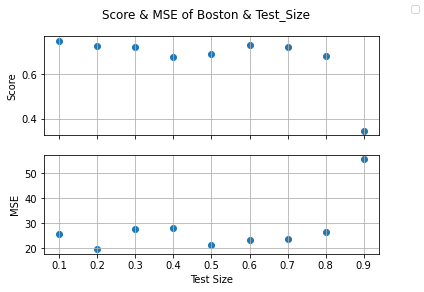

In [11]:
# plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle("Score & MSE of Boston & Test_Size")
ax2.set_xlabel("Test Size")
ax1.set_ylabel("Score")
ax2.set_ylabel("MSE")
xx = np.arange(0.1, 1.0, 0.1)
ax1.scatter(xx, T_score)
ax2.scatter(xx, mse)
fig.legend()
ax1.grid()
ax2.grid()
fig.show()

In [14]:
fig.savefig('./Score & MSE of Boston & Test_Size.png')